In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL

In [2]:
import tensorflow as tf 
import tensorflow.keras as keras

In [3]:
path_dir = "/data/petabyte/IMAGENET/Imagenet2012/"

In [4]:

def get_imagenet_dataset(path_dir,bs=32):
    
    if 'train' in path_dir: 
        raise ValueError('Specify the root directory not the train directory for the imagenet dataset')
    
    path_train = path_dir + '/train'
    path_val = path_dir + '/val'
    
    # specify image size ?????? -- lets set it to 224,224,3
    
    img_size = (224,224,3)
    
    train_dataset = tf.keras.utils.image_dataset_from_directory(path_train,batch_size=bs,image_size=(224,224))
    val_dataset = tf.keras.utils.image_dataset_from_directory(path_val,batch_size=bs)
    
    return train_dataset,val_dataset
    

In [5]:
train_dataset, test_dataset = get_imagenet_dataset(path_dir,bs=1)


Found 1281167 files belonging to 1000 classes.
Found 50000 files belonging to 1000 classes.


In [ ]:
tr_ds_1 = train_dataset.take(1)
tt_ds_1 = test_dataset.take(1)

for img,label in tr_ds_1 : 
    print(img.shape)
        
    i = 0
    img = np.array(img[i].numpy(),np.int32)
    #print(img)
    plt.figure()
    plt.imshow(img)
    plt.show()
    #plt.imshow(img[i].numpy())
    #plt.show()
    print(label[i].numpy())
    

In [ ]:
train_dataset.class_names[80]

In [ ]:
label6_test = '/data/petabyte/IMAGENET/Imagenet2012/train/n01496331/n01496331_10026.JPEG'
# /data/petabyte/IMAGENET/Imagenet2012/train/n01498041
#label_test = '/data/petabyte/IMAGENET/Imagenet2012/train/n01498041/n01498041_1.JPEG'
label_test = '/data/petabyte/IMAGENET/Imagenet2012/train/n01484850/n01484850_10016.JPEG'

In [ ]:
from PIL import Image 

im = Image.open(label_test)
im.show()


In [ ]:
import os

In [ ]:
train_dir = path_dir + '/train'
val_dir = path_dir + '/val'

for root,dirs,files in os.walk(train_dir,topdown=False):
    for subdir in dirs:
        print(subdir)

In [ ]:
# calculate mean RGB value for imagenet 
chan0_pixel_sum = 0
chan0_pixel_count = 0
chan1_pixel_sum = 0 
chan1_pixel_count = 0 
chan2_pixel_sum = 0 
chan2_pixel_count = 0 
img_count = 0

for img, label in train_dataset:
    if img_count % 100000 == 0: 
        print(img_count)
    IMG  = img[0]
    img_0 = np.array(IMG[:,:,0])
    img_1 = np.array(IMG[:,:,1])
    img_2 = np.array(IMG[:,:,2])
    
    chan0_pixel_count += (img_0.shape[0] * img_0.shape[1])
    chan1_pixel_count += (img_1.shape[0] * img_1.shape[1])
    chan2_pixel_count += (img_2.shape[0] * img_2.shape[1])
    
    chan0_pixel_sum += np.sum(img_0)
    chan1_pixel_sum += np.sum(img_1)
    chan2_pixel_sum += np.sum(img_2)
    img_count +=1 
    
chan0_mean = chan0_pixel_sum / chan0_pixel_count
chan1_mean = chan1_pixel_sum / chan1_pixel_count
chan2_mean = chan2_pixel_sum / chan2_pixel_count

print('chan0_mean=',chan0_mean)
print('chan1_mean=',chan1_mean)
print('chan2_mean',chan2_mean)

In [ ]:
# try rewriting the above !! 
means = []





In [ ]:
chan0_pixel_sum2 = 0
chan0_pixel_count2 = 0
chan1_pixel_sum2 = 0 
chan1_pixel_count2 = 0 
chan2_pixel_sum2 = 0 
chan2_pixel_count2 = 0 
img_count = 0

means = []

for img , label in train_dataset.take(1):
    IMG  = img[0]
    img_np = np.array(IMG)
    img_0 = np.array(IMG[:,:,0])
    img_1 = np.array(IMG[:,:,1])
    img_2 = np.array(IMG[:,:,2])
    
    chan0_pixel_count2 += (img_0.shape[0] * img_0.shape[1])
    chan1_pixel_count2 += (img_1.shape[0] * img_1.shape[1])
    chan2_pixel_count2 += (img_2.shape[0] * img_2.shape[1])
    
    chan0_pixel_sum2 += np.sum(img_0)
    chan1_pixel_sum2 += np.sum(img_1)
    chan2_pixel_sum2 += np.sum(img_2)

    chan0_mean2 = chan0_pixel_sum2 / chan0_pixel_count2
    chan1_mean2 = chan1_pixel_sum2 / chan1_pixel_count2
    chan2_mean2 = chan2_pixel_sum2 / chan2_pixel_count2 
    
    print('chan0_mean2=',chan0_mean2)
    print('chan1_mean2=',chan1_mean2)
    print('chan2_mean2=',chan2_mean2)
    
    IMG = img[0]
    mean_val  = tf.reduce_mean(IMG,axis=(0,1))
    print(mean_val)
    

In [ ]:
for img , label in train_dataset.take(1):
    IMG = img[0]
    mean_val  = tf.reduce_mean(IMG)
    print(mean_val)

In [ ]:
x = tf.constant([[1.,1.],[5.,5],[6.,6.]])
print(x.shape)
m = tf.reduce_mean(x)
print(m)
print(m.numpy())                 

In [ ]:
m1 =  tf.reduce_mean(x,0)
print(x)
print(m1)
print(m1.shape)
print(m.numpy())

In [ ]:
x[0][0].numpy()

In [ ]:
m1 =  tf.reduce_mean(x,1)
print(x)
print(m1)
print(m.numpy())

In [ ]:
m1 =  tf.reduce_mean(x)
print(m1)
print(m.numpy())


In [ ]:

means = []

for img , label in train_dataset.take(3):
    IMG = img[0]
    plt.imshow(np.array(IMG,dtype=np.int32))
    print('rand pixel val=',IMG[100][100][2])
    mean_val  = tf.reduce_mean(IMG,axis=(0,1))
    means.append(mean_val.numpy())
    
print('means list = ',means)
means_tensor = tf.constant(means)
final_mean = tf.reduce_mean(means_tensor,axis=0)
print('means_tensor=',means_tensor)
print('final_mean=',final_mean)
    

In [6]:

means = []
img_counter = 0
for img , label in train_dataset:
    if img_counter % 100000 == 0: 
            print(img_counter)
    
    IMG = img[0]
    #plt.imshow(np.array(IMG,dtype=np.int32))
    #print('rand pixel val=',IMG[100][100][2])
    mean_val  = tf.reduce_mean(IMG,axis=(0,1))
    means.append(mean_val.numpy())
    img_counter +=1
    
#print('means list = ',means)
means_tensor = tf.constant(means)
final_mean = tf.reduce_mean(means_tensor,axis=0)
#print('means_tensor=',means_tensor)
print('final_mean=',final_mean)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
final_mean= tf.Tensor([121.61894 116.63506 102.78873], shape=(3,), dtype=float32)


In [13]:
def imgnt_preprocess_meanRGBval_substract(img,label):
    """
    Use this function by mapping it over the tf.data.Dataset
    """
    mean_RGB_vals = tf.constant([121.62,116.63,102.79])
    print(img.shape)
    img[:,:,0] = img[:,:,0] - mean_RGB_vals[0]
    img[:,:,1] = img[:,:,1] - mean_RGB_vals[1]
    img[:,:,2] = img[:,:,2] - mean_RGB_vals[2]
    return img, label


In [16]:
def imgnt_meanRGBval_substract(img,label):
    mean_RGB_vals = [121.62,116.63,102.79]
    image_mean = tf.constant(mean_RGB_vals,dtype=tf.float32)
    image = tf.cast(img,tf.float32)
    image = image - image_mean
    return image, label

In [42]:
d1 = train_dataset.take(1)


tf.Tensor(
[[[[188.04329  136.56358   34.42965 ]
   [190.14711  126.17819   30.314333]
   [178.1062   123.46203   26.231586]
   ...
   [106.37595   72.29344   19.669107]
   [100.97485   62.486088  15.988697]
   [103.2333    68.5613    13.762568]]

  [[192.08667  126.54346   39.54345 ]
   [180.24301  121.401726  29.468906]
   [182.3607   130.53131   33.808475]
   ...
   [103.370346  75.51581   12.335208]
   [102.68451   61.088596  18.346226]
   [ 98.52026   63.766552  16.781397]]

  [[190.7477   123.1995    30.818958]
   [183.40944  130.53096   30.630661]
   [177.19867  129.16826   31.337511]
   ...
   [106.97069   61.60559   13.062586]
   [114.11879   67.61051   17.10308 ]
   [104.63112   64.26732   15.295536]]

  ...

  [[ 12.367734  17.230942  18.21529 ]
   [ 15.36784   17.903448  17.145535]
   [ 22.285463  22.710335  18.134033]
   ...
   [ 57.667793  37.968235  14.069037]
   [ 52.90347   37.785564  18.051651]
   [ 54.515526  42.549606  23.016554]]

  [[ 18.915514  18.14618   15.7723

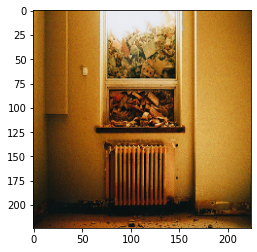

In [56]:
for img,label in d1:
    print(img)
    IMG = img[0]
    print(IMG[0][0][0])
    plt.imshow(np.array(IMG,dtype=np.int32))
    

In [44]:
d2 = d1.map(imgnt_meanRGBval_substract)

In [1]:
for img,label in d2:
    print(img)
    IMG = img[0]
    print(IMG[0][0][0])
    plt.imshow(np.array(IMG,dtype=np.int32))


NameError: name 'd2' is not defined